In [3]:
import numpy as np
from numpy import linalg

################################################################################
# Function: idempotents                                                        #
#                                                                              #
# Purpose: find principal idempotents of a Hermitian matrix                    #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#                                                                              #
# Returns: principal idempotents, eigenvalues                                  #
#                                                                              #
################################################################################

def idempotents(A):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    # Extracts eigenvalues and eigenvectors
    W,V = linalg.eigh(A)
    # Converts eigenvectors into orthonormal basis
    Q, R = linalg.qr(V) 
    Q = matrix(Q)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    idems = []
    evals = []
    i = 0
    j = 0
    while i < n:
        # Zero matrix
        E = matrix(n, n, 0)
        # Checks if eigenvectors share an eigenvalue
        while j < n and abs(W[i] - W[j]) < 0.01:
            # Converts eigenvector into column vecror
            v = Q.column(j).column()
            # Updates idempotent
            E = E + v*v.conjugate_transpose();
            j = j + 1
        E = E
        idems.append(E)
        evals.append(W[i].round(3))
        i = j
    return idems, evals

In [156]:
################################################################################
# Function: transfer                                                           #
#                                                                              #
# Purpose: return transfer matrix U(t) given adjacency matrix/Hamiltonian      #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   t        float                              time                           #
#   k        integer                            rounding accuracy              #
#                                                                              #
# Returns: transfer U(t)                                                       #
#                                                                              #
################################################################################

def transfer(A, t):
    A = matrix(A)
    return matrix(exp(-1*I*t*A))

In [157]:
# Example usage for C6
AC6 = matrix([[0,0,1,0,0,1],[0,0,0,1,1,0],[1,0,0,0,1,0],[0,1,0,0,0,1],[0,1,1,0,0,0],[1,0,0,1,0,0]])
EAC6, lAC6 = idempotents(AC6)
for i in range(len(lAC6)):
    print("Idempotent for", int(lAC6[i]))
    print(EAC6[i].round(3))

Idempotent for -2
[ 0.167 -0.167 -0.167  0.167  0.167 -0.167]
[-0.167  0.167  0.167 -0.167 -0.167  0.167]
[-0.167  0.167  0.167 -0.167 -0.167  0.167]
[ 0.167 -0.167 -0.167  0.167  0.167 -0.167]
[ 0.167 -0.167 -0.167  0.167  0.167 -0.167]
[-0.167  0.167  0.167 -0.167 -0.167  0.167]
Idempotent for -1
[ 0.333  0.333 -0.167 -0.167 -0.167 -0.167]
[ 0.333  0.333 -0.167 -0.167 -0.167 -0.167]
[-0.167 -0.167  0.333  0.333 -0.167 -0.167]
[-0.167 -0.167  0.333  0.333 -0.167 -0.167]
[-0.167 -0.167 -0.167 -0.167  0.333  0.333]
[-0.167 -0.167 -0.167 -0.167  0.333  0.333]
Idempotent for 1
[ 0.333 -0.333  0.167 -0.167 -0.167  0.167]
[-0.333  0.333 -0.167  0.167  0.167 -0.167]
[ 0.167 -0.167  0.333 -0.333  0.167 -0.167]
[-0.167  0.167 -0.333  0.333 -0.167  0.167]
[-0.167  0.167  0.167 -0.167  0.333 -0.333]
[ 0.167 -0.167 -0.167  0.167 -0.333  0.333]
Idempotent for 2
[0.167 0.167 0.167 0.167 0.167 0.167]
[0.167 0.167 0.167 0.167 0.167 0.167]
[0.167 0.167 0.167 0.167 0.167 0.167]
[0.167 0.167 0.167 0.167

In [158]:
UAC6 = transfer(AC6,np.pi/2); UAC6.round(5)

[  -0.33333  0.66667*I -0.33333*I   -0.33333   -0.33333 -0.33333*I]
[ 0.66667*I   -0.33333   -0.33333 -0.33333*I -0.33333*I   -0.33333]
[-0.33333*I   -0.33333   -0.33333  0.66667*I -0.33333*I   -0.33333]
[  -0.33333 -0.33333*I  0.66667*I   -0.33333   -0.33333 -0.33333*I]
[  -0.33333 -0.33333*I -0.33333*I   -0.33333   -0.33333  0.66667*I]
[-0.33333*I   -0.33333   -0.33333 -0.33333*I  0.66667*I   -0.33333]

In [159]:
exp(-1*I*np.pi*AC6/2).round(5)

[  -0.33333  0.66667*I -0.33333*I   -0.33333   -0.33333 -0.33333*I]
[ 0.66667*I   -0.33333   -0.33333 -0.33333*I -0.33333*I   -0.33333]
[-0.33333*I   -0.33333   -0.33333  0.66667*I -0.33333*I   -0.33333]
[  -0.33333 -0.33333*I  0.66667*I   -0.33333   -0.33333 -0.33333*I]
[  -0.33333 -0.33333*I -0.33333*I   -0.33333   -0.33333  0.66667*I]
[-0.33333*I   -0.33333   -0.33333 -0.33333*I  0.66667*I   -0.33333]

In [160]:
# Example usage for C5
AC5 = matrix([[0,1,0,0,1],[1,0,1,0,0],[0,1,0,1,0],[0,0,1,0,1],[1,0,0,1,0]]); AC5

[0 1 0 0 1]
[1 0 1 0 0]
[0 1 0 1 0]
[0 0 1 0 1]
[1 0 0 1 0]

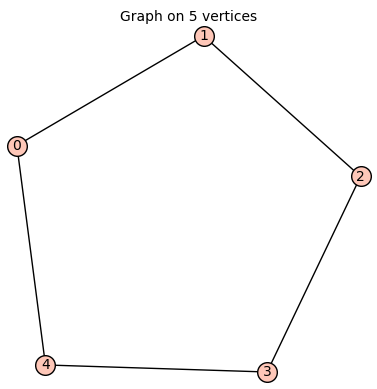

In [161]:
Graph(AC5)

In [162]:
UAC5 = transfer(AC5,np.pi); UAC5

[                  0.2 - 0.7456259390505819*I 0.037941022488206536 + 0.18640648476264549*I   0.3620589775117936 + 0.18640648476264554*I   0.3620589775117934 + 0.18640648476264543*I  0.037941022488206466 + 0.1864064847626456*I]
[ 0.03794102248820664 + 0.18640648476264565*I   0.20000000000000012 - 0.7456259390505822*I   0.03794102248820655 + 0.1864064847626456*I  0.36205897751179345 + 0.18640648476264565*I   0.3620589775117935 + 0.18640648476264565*I]
[  0.3620589775117936 + 0.18640648476264565*I  0.037941022488206605 + 0.1864064847626455*I     0.1999999999999999 - 0.745625939050582*I  0.03794102248820655 + 0.18640648476264576*I    0.3620589775117935 + 0.1864064847626456*I]
[  0.3620589775117936 + 0.18640648476264554*I   0.3620589775117933 + 0.18640648476264554*I  0.03794102248820658 + 0.18640648476264582*I   0.19999999999999996 - 0.7456259390505822*I   0.03794102248820655 + 0.1864064847626456*I]
[  0.03794102248820651 + 0.1864064847626458*I   0.3620589775117937 + 0.18640648476264576*I  

In [163]:
# Example usage for C4
AC4 = matrix([[0, 0, 1, 1],[0, 0, 1, 1],[1, 1, 0, 0],[1, 1, 0, 0]]); AC4

[0 0 1 1]
[0 0 1 1]
[1 1 0 0]
[1 1 0 0]

In [164]:
EAC4, lAC4 = idempotents(AC4)
for i in range(len(lAC4)):
    print("Idempotent for", int(lAC4[i]))
    print(EAC4[i].round(5))

Idempotent for -2
[ 0.25  0.25 -0.25 -0.25]
[ 0.25  0.25 -0.25 -0.25]
[-0.25 -0.25  0.25  0.25]
[-0.25 -0.25  0.25  0.25]
Idempotent for 0
[ 0.5 -0.5 -0.0 -0.0]
[-0.5  0.5  0.0 -0.0]
[-0.0  0.0  0.5 -0.5]
[-0.0 -0.0 -0.5  0.5]
Idempotent for 2
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


In [165]:
################################################################################
# Function: transfer_at_time_r                                                 #
#                                                                              #
# Purpose: find real part of transfer matrix at specific time and index        #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: real part of U(t) at index [i][j]                                   #
#                                                                              #
################################################################################

def transfer_at_time_r(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].real()) < 0.00001:
        return 0
    return U[i][j].real()

################################################################################
# Function: transfer_at_time_i                                                 #
#                                                                              #
# Purpose: find imaginary part of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: imaginary part of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_i(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].imag()) < 0.00001:
        return 0
    return U[i][j].imag()

################################################################################
# Function: transfer_at_time_a                                                 #
#                                                                              #
# Purpose: find absolute value of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_a(A,t,i,j):
    U = transfer(A,t)
    if U[i][j].abs() < 0.00001:
        return 0
    return U[i][j].abs()

In [166]:
transfer_at_time_r(DC4,1,0,0)

0.2919265817264288

In [143]:
# Example usage for directed C4 matrix
DC4 = np.matrix([[0,-1j,0,1j],[1j, 0, -1j, 0],[0,1j,0,-1j],[-1j,0,1j,0]]); matrix(DC4)

[   0.0 -1.0*I    0.0  1.0*I]
[ 1.0*I    0.0 -1.0*I    0.0]
[   0.0  1.0*I    0.0 -1.0*I]
[-1.0*I    0.0  1.0*I    0.0]

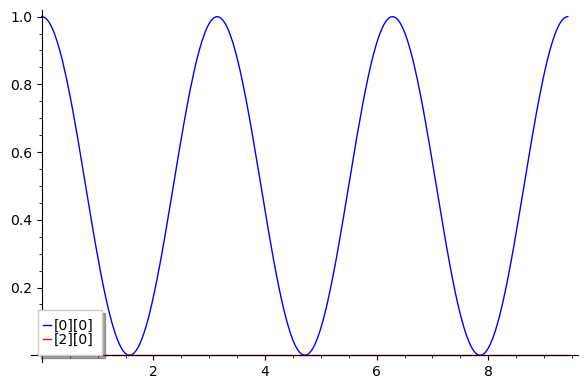

In [167]:
# Plots real part of U(t) for matrix DC4 from time 0 to 3pi at entry [0][0]
PDC400 = plot(transfer_at_time_r(DC4,x,0,0),0,3*np.pi, legend_label="[0][0]")
# Plots real part of U(t) for matrix DC4 from time 0 to 3pi at entry [2][0]
PDC420 = plot(transfer_at_time_i(DC4,x,2,0),0,3*np.pi, color="red", legend_label="[2][0]")
PDC400 + PDC420

In [80]:
# Example usage for simple Hermitian matrix
H = np.matrix([[0,1j],[-1j,0]]); matrix(H)

[   0.0  1.0*I]
[-1.0*I    0.0]

In [81]:
EH, lH = idempotents(H);
for i in range(len(lH)):
    print("Idempotent for", int(lH[i]))
    print(EH[i].round(5))

Idempotent for -1
[   0.5 -0.5*I]
[ 0.5*I    0.5]
Idempotent for 1
[   0.5  0.5*I]
[-0.5*I    0.5]


In [82]:
# Plots absolute value of U(t) for matrix H from time 0 to 3pi
PH00a = plot(transfer_at_time_a(H,x,0,0),0,3*np.pi)
PH01a = plot(transfer_at_time_a(H,x,0,1),0,3*np.pi)
PH10a = plot(transfer_at_time_a(H,x,1,0),0,3*np.pi)
PH11a = plot(transfer_at_time_a(H,x,1,1),0,3*np.pi)

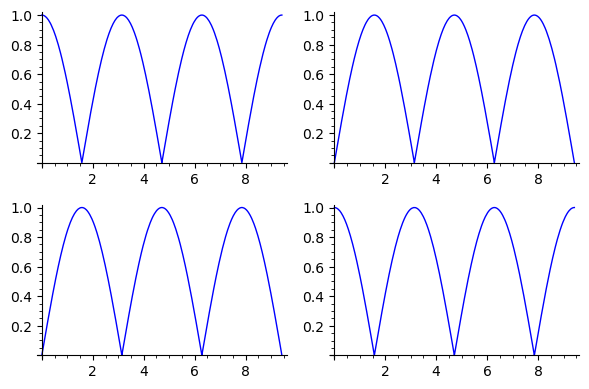

In [83]:
graphics_array(((PH00a,PH01a), (PH10a,PH11a)))

In [84]:
# Plots real part of U(t) for matrix H from time 0 to 3pi
PH00r = plot(transfer_at_time_r(H,x,0,0),0,3*np.pi)
PH01r = plot(transfer_at_time_r(H,x,0,1),0,3*np.pi)
PH10r = plot(transfer_at_time_r(H,x,1,0),0,3*np.pi)
PH11r = plot(transfer_at_time_r(H,x,1,1),0,3*np.pi)

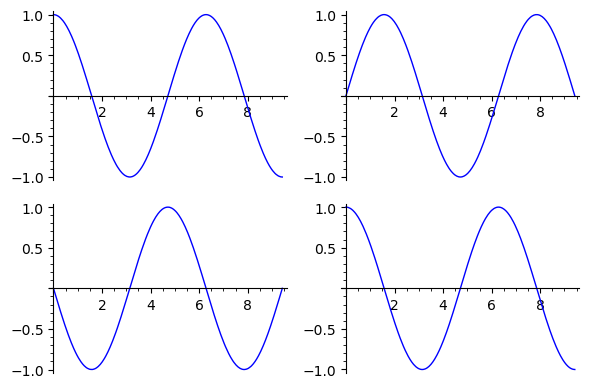

In [85]:
graphics_array(((PH00r,PH01r), (PH10r,PH11r)))

In [86]:
# Plots imaginary part of U(t) for matrix H from time 0 to 3pi
PH00i = plot(transfer_at_time_i(H,x,0,0),0,3*np.pi)
PH01i = plot(transfer_at_time_i(H,x,0,1),0,3*np.pi)
PH10i = plot(transfer_at_time_i(H,x,1,0),0,3*np.pi)
PH11i = plot(transfer_at_time_i(H,x,1,1),0,3*np.pi)

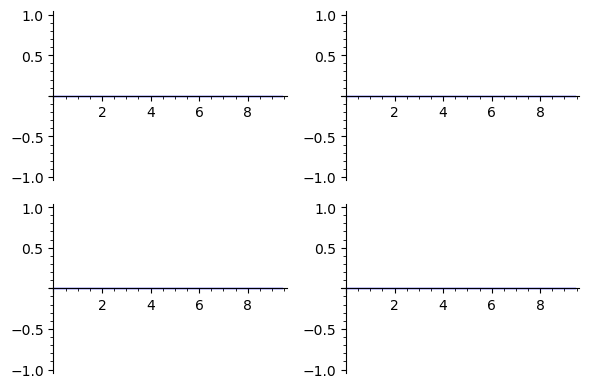

In [87]:
graphics_array(((PH00i,PH01i), (PH10i,PH11i)))

In [88]:
################################################################################
# Function: parallel                                                           #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are parallel                               #
#                                                                              #
################################################################################

def parallel(a,b,idems):
    for M in idems:
        va = M[a].conjugate()
        vb = M[b]
        anorm=np.sqrt(M[a].dot_product(va))
        bnorm=np.sqrt(M[b].dot_product(M[b].conjugate()))
#         print(va)
#         print(vb)
#         print(anorm)
#         print(bnorm)
#         print(va.dot_product(vb))
#         print(abs(va.dot_product(vb))-anorm*bnorm)
        if abs(abs(va.dot_product(vb))-anorm*bnorm)>0.0001:
            return False
    return True

In [89]:
################################################################################
# Function: cospec                                                             #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are cospectral                             #
#                                                                              #
################################################################################

def cospec(a,b,idems):
    for M in idems:
        if abs(M[a,a]- M[b,b])>0.001:
#             print(M[a,a])
#             print(M[b,b])
            return False
    return True

################################################################################
# Function: strcospec                                                          #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are strongly cospectral                    #
#                                                                              #
################################################################################

def strcospec(a,b,idems):
    if cospec(a,b,idems) and parallel(a,b,idems):
        return True
    return False

In [90]:
strcospec(0,1,EH)

True

In [91]:
cospec(0,1,EH)

True

In [92]:
parallel(0,1,EH)

True